## z-values, critical values, and error probabilities

Hypothesis tests are built in **z-space**, where decisions are made by
comparing a standardized test statistic to a **critical value**.

---

## From α to the critical value

The **significance level** \( \alpha \) is defined as:

$$
\alpha = P_{H_0}(Z \ge z_\alpha)
$$

where:

- \( Z \sim \mathcal{N}(0, 1) \) under the null hypothesis
- \( z_\alpha \) is the **critical z-value**

This value is determined by:

$$
z_\alpha = \Phi^{-1}(1 - \alpha)
$$

Once \( \alpha \) is chosen:

- The **critical z-value is fixed**
- The **decision boundary is fixed**

In the original data scale, the critical value becomes:

$$
c = \mu_0 + z_\alpha \cdot \sigma
$$

Any observed test statistic greater than \( c \) leads to rejection of \( H_0 \).

---

## Interpretation of α (Type I error)

Under the null hypothesis \( H_0 \):

- The test statistic follows a distribution centered at \( \mu_0 \)
- The area to the **right of the critical value** equals \( \alpha \)

Thus, \( \alpha \) represents the probability of **rejecting a true null hypothesis**.

Graphically:
- It is the shaded tail area under the **\( H_0 \)** curve beyond the critical value
- It depends only on the chosen cutoff, not on the alternative hypothesis

---

## Defining β using the same critical value

The **Type II error probability** \( \beta \) is defined as:

$$
\beta = P_{H_1}(X \le c)
$$

Key points:

- The **same critical value** \( c \) is used
- The probability is now computed under the **alternative distribution**
- \( \beta \) is the probability of **failing to reject \( H_0 \)** when \( H_1 \) is true

Graphically:
- It is the shaded area under the **\( H_1 \)** curve to the **left of the critical value**

---

## Relationship between z-values, α, and β

- \( \alpha \) fixes the **critical z-value**
- The critical z-value fixes the **decision boundary**
- \( \beta \) depends on how far the alternative distribution lies from that boundary

The standardized separation between hypotheses is:

$$
z = \frac{\mu_1 - \mu_0}{\sigma}
$$

Larger separation implies:

- Smaller overlap between distributions
- Smaller \( \beta \)
- Higher statistical power

---

## Power as a probability statement

Statistical power is defined as:

$$
\text{Power} = 1 - \beta = P_{H_1}(X > c)
$$

Thus:

- \( \alpha \) controls the **false rejection rate**
- \( \beta \) controls the **missed detection rate**
- Both are probabilities defined by **areas under normal curves**
- The z-scale provides a common framework to compare them


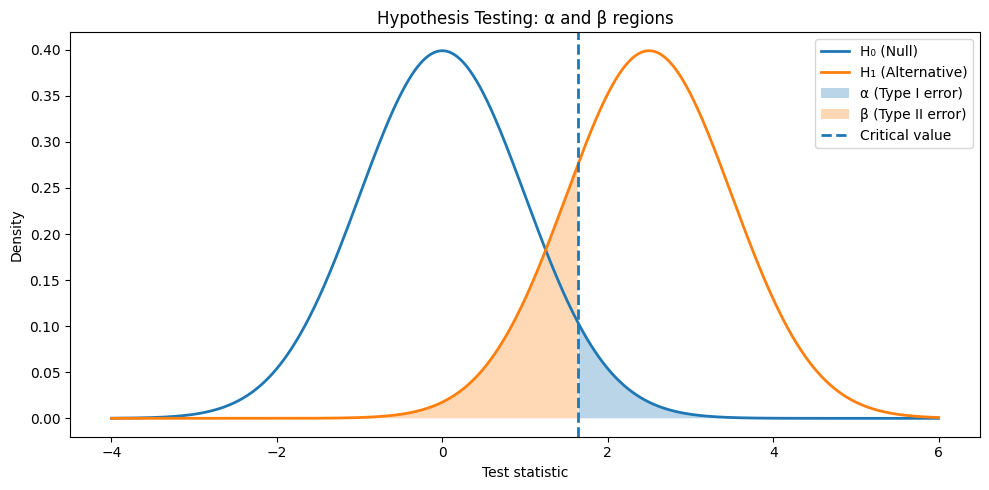

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
alpha = 0.05
power = 0.8
mu0 = 0
mu1 = 2.5   # separation for visualization
sigma = 1

# Critical value
z_alpha = norm.ppf(1 - alpha)
critical_value = mu0 + z_alpha * sigma

x = np.linspace(-4, 6, 1000)

# PDFs
pdf_h0 = norm.pdf(x, mu0, sigma)
pdf_h1 = norm.pdf(x, mu1, sigma)

plt.figure(figsize=(10,5))

# Plot distributions
plt.plot(x, pdf_h0, label="H₀ (Null)", linewidth=2)
plt.plot(x, pdf_h1, label="H₁ (Alternative)", linewidth=2)

# Alpha region
plt.fill_between(x, pdf_h0, where=(x >= critical_value),
                 alpha=0.3, label="α (Type I error)")

# Beta region
plt.fill_between(x, pdf_h1, where=(x <= critical_value),
                 alpha=0.3, label="β (Type II error)")

# Critical line
plt.axvline(critical_value, linestyle="--", linewidth=2,
            label="Critical value")

plt.xlabel("Test statistic")
plt.ylabel("Density")
plt.title("Hypothesis Testing: α and β regions")
plt.legend()
plt.tight_layout()
plt.show()
